

- My name: Aly El-Deen Yasser Ali
- Type of project: Simple Project
- Group : G-6


## The problem I try to solve:
  is to make a model that can classify the types of iris flower by using KNN and SVM and it is important as a train for me as a beginner to practice on building models that can analyse the data like this

## Objectives of assignment:
is to train a SVM and KNN model to solve this problem with a good accuracy

## Expected Output:
A clean and well-structured dataset ready for model training and trained KNN and SVM models



In [16]:
# Source : https://www.geeksforgeeks.org/iris-dataset/
# The Data set I used is : Iris Data set
# Small brief about it : The Iris dataset is one of the most well-known and commonly used datasets in the field of machine learning.
# It is a 150 samples of iris flowers Data set from three different species: Setosa, Versicolor, and Virginica.
# Each sample includes four features: sepal length, sepal width, petal length, and petal width.

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## First Step
To load the data of data set and check if there is any missing values or any other outliers

In [17]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Target'] = iris.target
# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print(data.head())
data

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64


<Axes: >

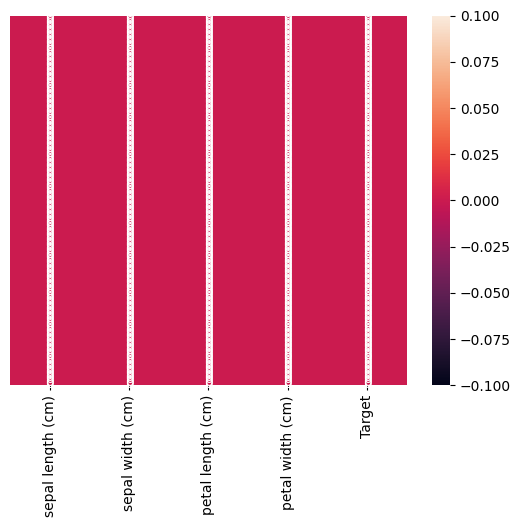

In [18]:
# Check for missing values
print(data.isnull().sum())

# Check for outliers
sns.heatmap(data.isnull(),yticklabels=False, annot=True)
# As we see the data is perfect and doesn t need to be cleaned by any method

# Second Step
As we see the data doesn't need cleaning so we will start data analyse the data using KNN first then SVM then compare between their values

In [19]:
# Feature Selection
x = data.drop('Target', axis=1)
y = data['Target']

# First we will split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# To convert them to numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Third Step
### KNN Model
KNN brief: It is one of machine learning model that is used to classify data by calculation the distance between the data needed to be classified and the nearest K data around it

In [20]:
# Function to calculate distance between the points
def calcDistance(a, b):
  return np.sqrt(np.sum(a - b)**2)

In [21]:
def singlePrediction(x_train, y_train, x_test, k):
  # Calculate the distance between the test point and all the training points
  distance = np.array([calcDistance(x_test, x) for x in x_train])
  # Get the indices of the k nearest neighbors
  k_indices = np.argsort(distance)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

In [22]:
def predict(x_train, y_train, x_test, k):
  prediction = np.array([])
  for i in x_test:
    prediction = np.append(prediction , singlePrediction(x_train, y_train, i, k))
  return np.array(prediction)

In [23]:
# To Get the best Value in KNN with Best K
final_pre = np.array([])
final_accu = -1
final_k = -1

# K from 1 to 10
for i in range(1, 11):
  # Prediction done in each k
  prediction = predict(x_train, y_train, x_test, i)
  accuracy = np.mean(prediction == y_test)

  # To Compare the values of Accuracy
  if accuracy > final_accu:
    final_k = i
    final_accu = accuracy
    final_pre = prediction

# To Print the Best Value of KNN
print("Best K in KNN:", final_k)
print("Best Accuracy in KNN:", final_accu)
print(f"Best Predictions: {final_pre}")
print(f"Actual labels: {y_test}")
print("Classification Report:")
print(classification_report(y_test, final_pre))


Best K in KNN: 9
Best Accuracy in KNN: 0.9333333333333333
Best Predictions: [1. 0. 2. 1. 2. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 2. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Fourth Step
### SVM Model
SVM brief : It is a machine learning model that use a linear model and try to find linear decision that best seprates data. The best hyperplane is the one that yields the largest separation between both classes.

In [24]:
# SVM code train and prediction
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train, y_train)
predict = svm.predict(x_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, predict)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, predict))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### To divided the element and put them on a graph
we will need to make reduce dimensionality to 2D for visualization

In [26]:
# Plot decision boundaries
def plotDecBound(x, y, model, title):
    x_min = x[:, 0].min() - 1
    y_min=  x[:, 1].min() - 1
    x_max = x[:, 0].max() + 1
    y_max = x[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

In [27]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Split PCA-transformed data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Train SVM on PCA-transformed data
svm_pca = SVC(kernel='linear', C=1.0, random_state=0)
svm_pca.fit(x_train_pca, y_train_pca)

SVC(kernel='linear', random_state=0)

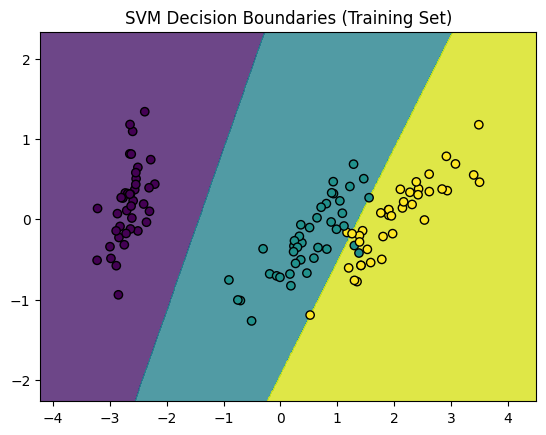

In [28]:
# To show the x_train figure
plotDecBound(x_train_pca, y_train_pca, svm_pca, "SVM Decision Boundaries (Training Set)")

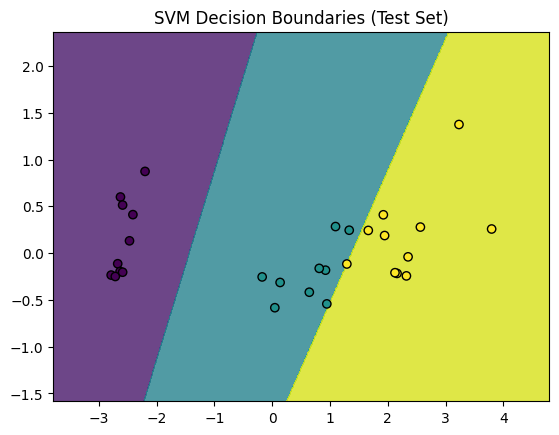

In [29]:
# To show the x_test figure
plotDecBound(x_test_pca, y_test_pca, svm_pca, "SVM Decision Boundaries (Test Set)")

# Reference

In [30]:
# =============================================================================== References ===================================================================================
                                                            # 1st Reference : https://www.youtube.com/watch?v=OS2m0f2gVJ0
                                                            # 2nd Reference : https://www.youtube.com/watch?v=yHC_1BiVy8E
                                                            # 3rd Reference : https://www.geeksforgeeks.org/iris-dataset/
                                                            # 4th Reference : https://www.youtube.com/watch?v=Q7vT0--5VII&t=36s